1. Loading Libraries

In [1]:
#loading libraries
 # importing the pandas library for data manipulation
import pandas as pd
# importing the numpy library for mathematical computations
import numpy as np
# importing the scipy library for data transformation
from scipy.stats import zscore
 # importing the seaborn library for data visualization
import seaborn as sns
# importing the matplotlib library for data visualization
import matplotlib.pyplot as plt
# importing train_test_split function from sklearn library
 # for splitting the dataset into the train and test sets
from sklearn.model_selection import train_test_split
# importing logistic regression algorithm from sklearn library
from sklearn.linear_model import LogisticRegression
# importing evaluation metrics from sklearn library
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('goodreads_data.csv')
#drop rows where Genres column contain []
df = df[df['Genres'] != '[]']
#convert Genres column from list to string
df['Genres'] = df['Genres'].apply(lambda x: x[1:-1].replace("'", "").replace(" ", "").split(','))
df_model = df.copy()
print(df_model)

      Unnamed: 0                                               Book  \
0              0                              To Kill a Mockingbird   
1              1  Harry Potter and the Philosopher’s Stone (Harr...   
2              2                                Pride and Prejudice   
3              3                          The Diary of a Young Girl   
4              4                                        Animal Farm   
...          ...                                                ...   
9993        9993                                    Call To Crusade   
9994        9994  Die Känguru-Chroniken (Die Känguru-Chroniken, #1)   
9995        9995                    Breeders (Breeders Trilogy, #1)   
9997        9997                              The Republic of Trees   
9998        9998                     Waking Up (Healing Hearts, #1)   

              Author                                        Description  \
0         Harper Lee  The unforgettable novel of a childhood in a sl... 

In [3]:
#delete values in the Genres column and keep only the first value
df_model['Genres'] = df_model['Genres'].apply(lambda x: x[0])
df_model

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,Classics,4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,Fantasy,4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...",Classics,4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,Classics,4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,Classics,3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...
...,...,...,...,...,...,...,...,...
9993,9993,Call To Crusade,Tom Vetter,"In Call To Crusade, Tom Vetter begins the Sieg...",HistoricalFiction,4.56,39,https://www.goodreads.com/book/show/21521247-c...
9994,9994,"Die Känguru-Chroniken (Die Känguru-Chroniken, #1)",Marc-Uwe Kling,"""Kannst du heute mal bezahlen?"", fragt das Kän...",Humor,4.30,"13,969",https://www.goodreads.com/book/show/6392654-di...
9995,9995,"Breeders (Breeders Trilogy, #1)",Ashley Quigley,How far would you go? If human society was gen...,Dystopia,3.44,276,https://www.goodreads.com/book/show/22085400-b...
9997,9997,The Republic of Trees,Sam Taylor,This dark fable tells the story of four Englis...,Fiction,3.29,383,https://www.goodreads.com/book/show/891262.The...


In [4]:
# drop columns that are not needed
df_model = df_model.drop(columns=['Unnamed: 0', 'Description', 'URL'])
df_model

,Book,Author,Genres,Avg_Rating,Num_Ratings
0,To Kill a Mockingbird,Harper Lee,Classics,4.27,"5,691,311"
1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Fantasy,4.47,"9,278,135"
2,Pride and Prejudice,Jane Austen,Classics,4.28,"3,944,155"
3,The Diary of a Young Girl,Anne Frank,Classics,4.18,"3,488,438"
4,Animal Farm,George Orwell,Classics,3.98,"3,575,172"
...,...,...,...,...,...
9993,Call To Crusade,Tom Vetter,HistoricalFiction,4.56,39
9994,"Die Känguru-Chroniken (Die Känguru-Chroniken, #1)",Marc-Uwe Kling,Humor,4.30,"13,969"
9995,"Breeders (Breeders Trilogy, #1)",Ashley Quigley,Dystopia,3.44,276
9997,The Republic of Trees,Sam Taylor,Fiction,3.29,383


In [5]:
# drop columns that are not needed
df_model = df_model.drop(columns=['Book','Author'])

In [6]:
print(type(df_model['Num_Ratings'].iloc[0]))

<class 'str'>


In [7]:
# romove strings from 'Num_Ratings' column
# Step 1: Remove quotes, commas, and whitespace safely
df_model['Num_Ratings'] = df_model['Num_Ratings'].astype(str)                  # Ensure it's string
df_model['Num_Ratings'] = df_model['Num_Ratings'].str.replace(r'[",]', '', regex=True)  # Remove " and ,
df_model.head()

,Genres,Avg_Rating,Num_Ratings
0,Classics,4.27,5691311
1,Fantasy,4.47,9278135
2,Classics,4.28,3944155
3,Classics,4.18,3488438
4,Classics,3.98,3575172


In [8]:
#convert num_ratings to numeric
df_model['Num_Ratings'] = pd.to_numeric(df_model['Num_Ratings'], errors='coerce')
df_model.head()

,Genres,Avg_Rating,Num_Ratings
0,Classics,4.27,5691311
1,Fantasy,4.47,9278135
2,Classics,4.28,3944155
3,Classics,4.18,3488438
4,Classics,3.98,3575172


In [9]:
#display max and min values of Num_Ratings
print("Max Num_Ratings:", df_model['Num_Ratings'].max())
print("Min Num_Ratings:", df_model['Num_Ratings'].min())

Max Num_Ratings: 9278135
Min Num_Ratings: 4


In [10]:
print("Max Avg_Rating:", df_model['Avg_Rating'].max())
print("Min Avg_Rating:", df_model['Avg_Rating'].min())

Max Avg_Rating: 5.0
Min Avg_Rating: 1.64


In [11]:
# Filter the dataset
df_model = df_model[
    (df_model['Num_Ratings'] >= 10000) & 
    (df_model['Num_Ratings'] <= 9000000) & 
    (df_model['Avg_Rating'] >= 2.0) & 
    (df_model['Avg_Rating'] <= 5.0)
]


In [12]:
print("Original size:", len(df))
print("Filtered size:", len(df_model))
print("Rows removed:", len(df) - len(df_model))


Original size: 9040
Filtered size: 5655
Rows removed: 3385


In [13]:
df_model = df_model.drop_duplicates(subset=['Avg_Rating'])
df_model

,Genres,Avg_Rating,Num_Ratings
0,Classics,4.27,5691311
2,Classics,4.28,3944155
3,Classics,4.18,3488438
4,Classics,3.98,3575172
5,Classics,4.32,1924063
...,...,...,...
6686,Fantasy,4.66,16743
8238,Fantasy,4.59,13733
8440,Fiction,3.27,78190
8543,Comics,4.70,21517


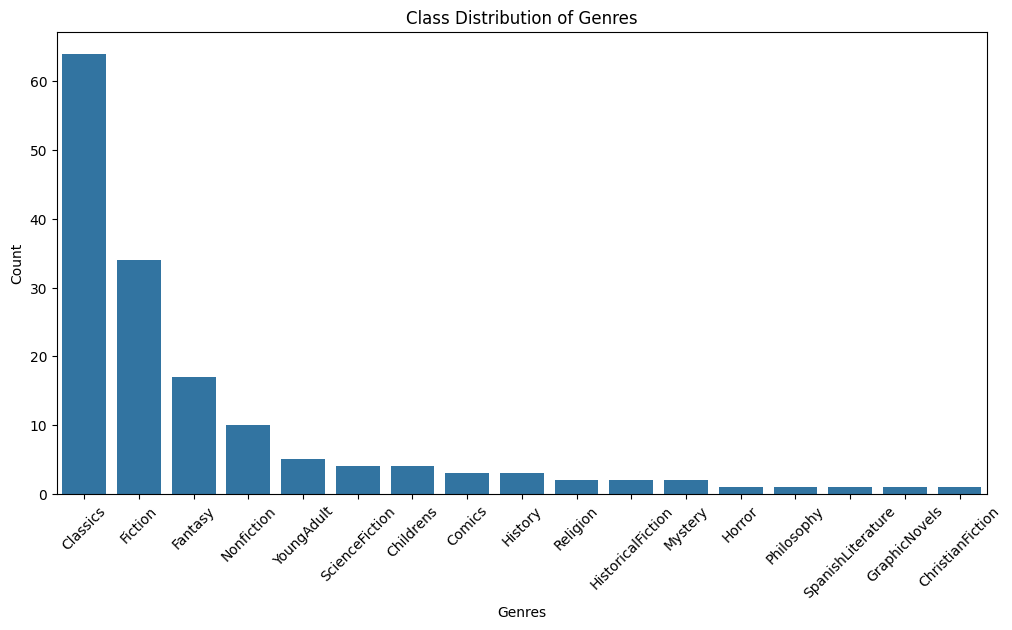

In [14]:
#display the class distribution of Genres in graph
plt.figure(figsize=(12, 6))
sns.countplot(data=df_model, x='Genres', order=df_model['Genres'].value_counts().index)
plt.title('Class Distribution of Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


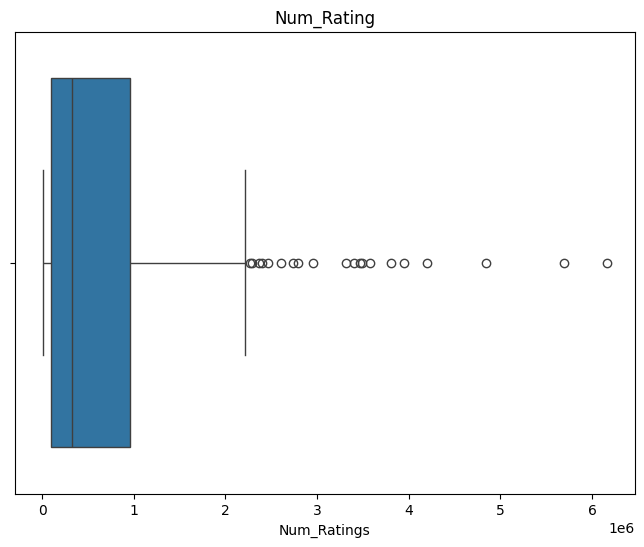

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_model['Num_Ratings'])
plt.title("Num_Rating")
plt.show()

In [16]:
df_model['Num_Ratings'] = np.log1p(df_model['Num_Ratings'])

In [17]:
# Calculate IQR
Q1 = df_model['Num_Ratings'].quantile(0.25)
Q3 = df_model['Num_Ratings'].quantile(0.75)
IQR = Q3 - Q1

# Set bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers directly in df
df_model = df_model[(df_model['Num_Ratings'] >= lower_bound) & (df_model['Num_Ratings'] <= upper_bound)]

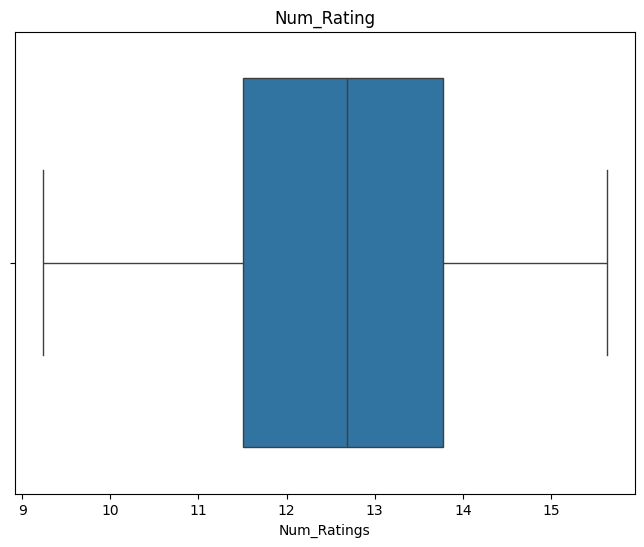

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_model['Num_Ratings'])
plt.title("Num_Rating")
plt.show()

In [19]:
# Calculate IQR
Q1 = df_model['Avg_Rating'].quantile(0.25)
Q3 = df_model['Avg_Rating'].quantile(0.75)
IQR = Q3 - Q1

# Set bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers directly in df
df_model = df_model[(df_model['Avg_Rating'] >= lower_bound) & (df_model['Avg_Rating'] <= upper_bound)]

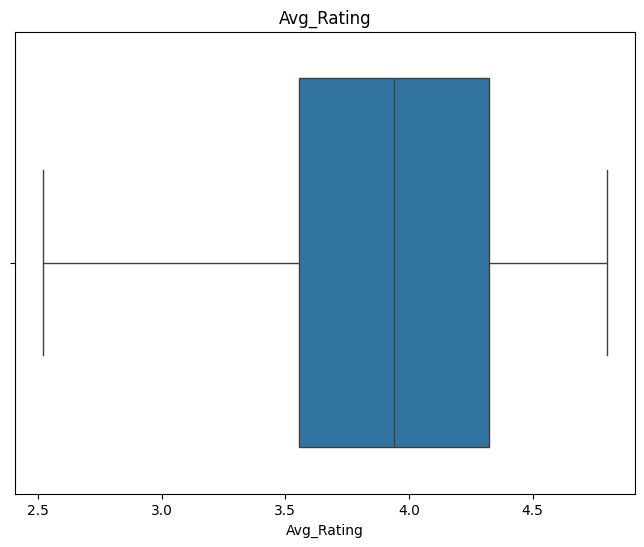

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_model['Avg_Rating'])
plt.title("Avg_Rating")
plt.show()

In [21]:
#display genres column
print(df_model['Genres'].value_counts().head(30))
#count the number of unique genres
print(df_model['Genres'].nunique())

Genres
Classics             64
Fiction              34
Fantasy              17
Nonfiction           10
YoungAdult            5
ScienceFiction        4
Childrens             4
Comics                3
History               3
Religion              2
HistoricalFiction     2
Mystery               2
Horror                1
Philosophy            1
SpanishLiterature     1
GraphicNovels         1
ChristianFiction      1
Name: count, dtype: int64
17


In [22]:
# drop rows drop the rows where the Genres column is not in the top 30 values
df_model = df_model[df_model['Genres'].isin(df_model['Genres'].value_counts().head(12).index)]
print(df_model['Genres'].value_counts().head(12))

Genres
Classics             64
Fiction              34
Fantasy              17
Nonfiction           10
YoungAdult            5
Childrens             4
ScienceFiction        4
Comics                3
History               3
HistoricalFiction     2
Religion              2
Mystery               2
Name: count, dtype: int64


In [23]:
# drop rows drop the rows where the Genres column is not in the top 30 values
df_model = df_model[df_model['Genres'].isin(df_model['Genres'].value_counts().head(4).index)]
print(df_model['Genres'].value_counts().head(4))

Genres
Classics      64
Fiction       34
Fantasy       17
Nonfiction    10
Name: count, dtype: int64


In [24]:
df_model['Genres'] = df_model['Genres'].astype('string')
print(df_model['Genres'].dtype)

string


In [25]:
df_model

,Genres,Avg_Rating,Num_Ratings
0,Classics,4.27,15.554451
2,Classics,4.28,15.187746
3,Classics,4.18,15.064965
4,Classics,3.98,15.089524
5,Classics,4.32,14.469950
...,...,...,...
6210,Fiction,2.52,10.977158
6686,Fantasy,4.66,9.725795
8238,Fantasy,4.59,9.527630
8440,Fiction,3.27,11.266910


In [26]:
#display genres column all values
print(df_model['Genres'].unique())

<StringArray>
['Classics', 'Fantasy', 'Fiction', 'Nonfiction']
Length: 4, dtype: string


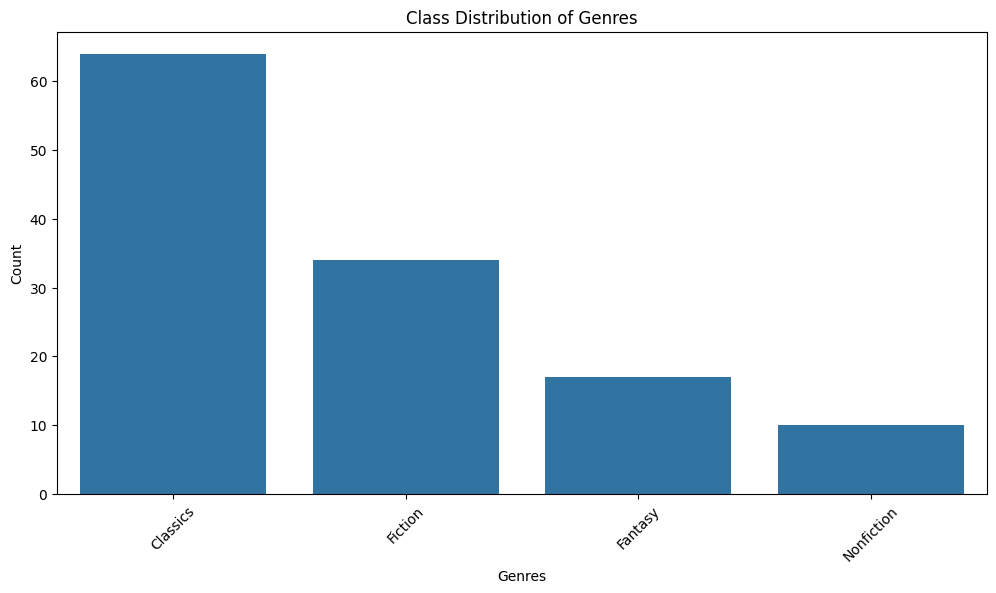

In [27]:
#display the class distribution of Genres in graph
plt.figure(figsize=(12, 6))
sns.countplot(data=df_model, x='Genres', order=df_model['Genres'].value_counts().index)
plt.title('Class Distribution of Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


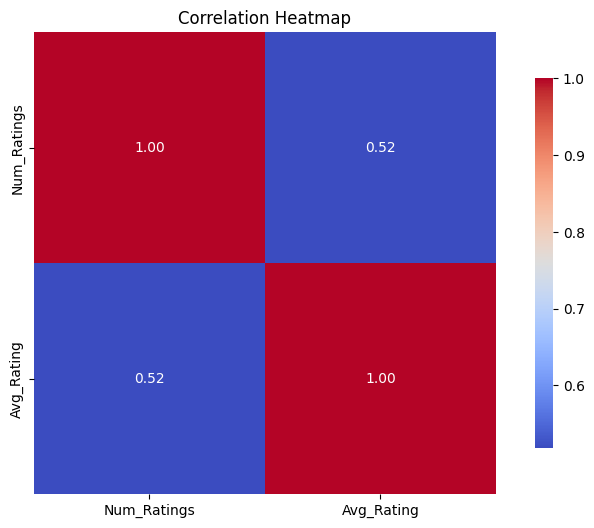

In [28]:
#create heatmap between Num_Ratings and Avg_Rating
plt.figure(figsize=(10, 6))
sns.heatmap(df_model[['Num_Ratings', 'Avg_Rating']].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap")
plt.show()

In [29]:
# separate the target feature from other feature
X = df_model.drop(columns=['Genres'])  # features
y = df_model['Genres'] # target variable


In [30]:
#apply zscore to the features
X = X.apply(zscore)
print(X.head())

   Avg_Rating  Num_Ratings
0    0.878718     1.718124
2    0.900586     1.492432
3    0.681912     1.416866
4    0.244565     1.431981
5    0.988055     1.050661


In [31]:
from sklearn.preprocessing import StandardScaler

# Scaling the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    scaled_df, y, test_size=0.2, random_state=42)
print("X train shape: {} and y train shape: {}".format(
    X_train.shape, y_train.shape))
print("X test shape: {} and y test shape: {}".format(X_test.shape, y_test.shape))

X train shape: (100, 2) and y train shape: (100,)
X test shape: (25, 2) and y test shape: (25,)


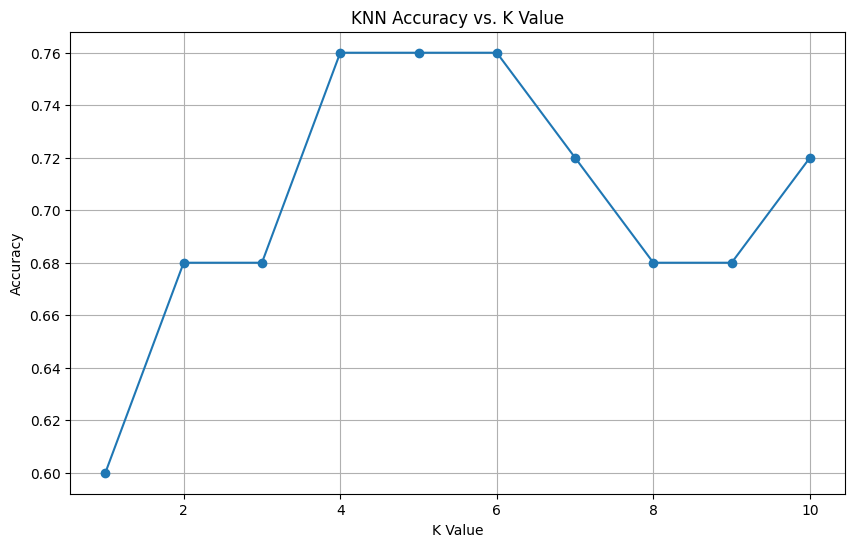

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

accuracy = []
k_range = range(1, 11)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy.append(acc)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracy, marker='o')
plt.title('KNN Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [34]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))


Accuracy: 0.72
Precision: 0.6564444444444445
Recall: 0.72
F1 Score: 0.6775454545454545


c:\Users\jason\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
# Evaluate training accuracy
y_train_pred = knn.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)

# Evaluate testing accury_test_pred = kdfmodel.predict(X_test)test)
y_test_pred = knn.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy: {test_acc:.2f}")


Training Accuracy: 0.66
Testing Accuracy: 0.72


In [36]:
#apply Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.52


In [37]:
#apply svd algorithm
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, random_state=42)
svd.fit(X_train)
# Transform the data
X_train_svd = svd.transform(X_train)
X_test_svd = svd.transform(X_test)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_svd, y_train)
y_pred = log_reg.predict(X_test_svd)
print("Accuracy after SVD:", accuracy_score(y_test, y_pred))

Accuracy after SVD: 0.72


In [38]:
from sklearn.metrics import classification_report

# After predicting
y_pred = knn.predict(X_test)

# Handle divisions by zero gracefully
report = classification_report(y_test, y_pred, zero_division=1)
print(report)


              precision    recall  f1-score   support

    Classics       0.72      0.93      0.81        14
     Fantasy       0.50      0.33      0.40         3
     Fiction       0.80      0.67      0.73         6
  Nonfiction       1.00      0.00      0.00         2

    accuracy                           0.72        25
   macro avg       0.76      0.48      0.48        25
weighted avg       0.74      0.72      0.68        25



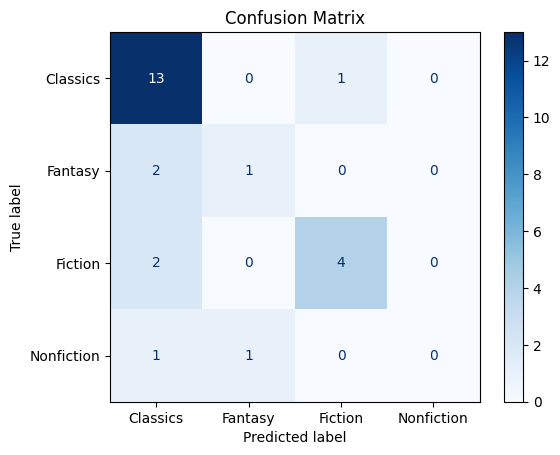

None


In [39]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
print(plt.show())


In [40]:
import joblib
joblib.dump(knn, 'knn_author_model.joblib')
#dump sclaler
joblib.dump(scaler, 'scaler.joblib')


['scaler.joblib']

In [41]:
print(df_model['Genres'].value_counts(normalize=True))


Genres
Classics      0.512
Fiction       0.272
Fantasy       0.136
Nonfiction     0.08
Name: proportion, dtype: Float64


In [42]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt

# Load model, scaler, and original dataset
knn_model = joblib.load('knn_author_model.joblib')
scaler = joblib.load('scaler.joblib')
df = pd.read_csv('info.csv')  # Replace with your dataset path

# Keep a copy of only the features used in training
features = df[['Avg_Rating', 'Num_Ratings']]

# Scale the features like in training
scaled_features = scaler.transform(features)

# Input values
avg_rating = 4.27	
num_ratings = 5691311

# Format input as DataFrame and scale
input_data = pd.DataFrame({'Avg_Rating': [avg_rating], 'Num_Ratings': [num_ratings]})
scaled_input = scaler.transform(input_data)

#Predict genre
predicted_genre = knn_model.predict(scaled_input)[0]
print(f"Predicted Genre: {predicted_genre}")

# Find the nearest neighbor
neighbor_index = knn_model.kneighbors(scaled_input, return_distance=False)[0][0]
nearest_book = df.iloc[neighbor_index]

# Display the nearest book info
print("\nMost Similar Book in Dataset:")
print(f"Title : {nearest_book['Book']}")
print(f"Author: {nearest_book['Author']}")
print(f"Genre : {nearest_book['Genres']}")
print(f"URL: {nearest_book['URL']}")

# Top 5 similar books
neighbor_indices = knn_model.kneighbors(scaled_input, return_distance=False)[0]
print("\nTop 5 Recommended Books:")
for idx in neighbor_indices:
    book = df.iloc[idx]
    print(f"- {book['Book']} by {book['Author']} ({book['Genres']})")





Predicted Genre: Classics

Most Similar Book in Dataset:
Title : The Adventures of Huckleberry Finn
Author: Mark Twain
Genre : ['Classics', 'Fiction', 'Historical Fiction', 'Literature', 'Young Adult', 'Adventure', 'School']
URL: https://www.goodreads.com/book/show/2956.The_Adventures_of_Huckleberry_Finn

Top 5 Recommended Books:
- The Adventures of Huckleberry Finn by Mark Twain (['Classics', 'Fiction', 'Historical Fiction', 'Literature', 'Young Adult', 'Adventure', 'School'])
- The Outsiders by S.E. Hinton (['Classics', 'Young Adult', 'Fiction', 'School', 'Read For School', 'Realistic Fiction', 'Coming Of Age'])
- Green Eggs and Ham by Dr. Seuss (['Childrens', 'Picture Books', 'Fiction', 'Classics', 'Poetry', 'Fantasy', 'Humor'])
- The Metamorphosis by Franz Kafka (['Classics', 'Fiction', 'Fantasy', 'Philosophy', 'Literature', 'Short Stories', 'School'])
- Gone with the Wind by Margaret Mitchell (['Classics', 'Historical Fiction', 'Fiction', 'Romance', 'Historical', 'War', 'Literatur